In [5]:
import kwant
import numpy as np
from cmath import exp
from math import pi, sqrt, tanh
# For plotting
# %run matplotlib_setup.ipy
import matplotlib.pyplot as plt
from ipywidgets import interact
import time
import sys
import tinyarray

In [13]:
# armchair edges

t=1.0
t_sc=0.5

# Define the graphene lattice

tau_x = tinyarray.array([[0, 1], [1, 0]])
tau_y = tinyarray.array([[0, -1j], [1j, 0]])
tau_z = tinyarray.array([[1, 0], [0, -1]])


def make_system(W=200, L=200, gn=0, m=0.1, mu=0.6, phi=0):
            
    def qh_slab(pos):
        (x, y) = pos 
        return (0 <= x < L) and (0 <= y < W)

    def hopping_ab(site_i, site_j, phi):
        xi, yi = site_i.pos
        xj, yj = site_j.pos
#         # modulated hopping in x direction
        H1=-t*exp(-1j * pi* phi * (xi - xj) * (yi + yj-W))
        return np.kron(H1,np.eye(2))
   
    def onsiteA(site, m, mu ,gn):
        return  (m- mu)*np.eye(2) - gn* tau_z
    
    def onsiteB(site, m, mu, gn):
        return  -(m+ mu)*np.eye(2)- gn* tau_z

    
    # Define the graphene lattice
    sin_30, cos_30 = (1 / 2, sqrt(3) / 2)
    lat = kwant.lattice.general([(sqrt(3), 0), (0, 1)],
                                [(0, 0), (1/sqrt(3), 0), (3/sqrt(3)/2, 1/2),(5/sqrt(3)/2, 1/2)],norbs=2)
    subA1, subB1,subA2, subB2 = lat.sublattices
    syst = kwant.Builder()
#     syst[lat.shape(qh_slab, (0,0))] = onsite
    syst[subA1.shape(qh_slab, (0,0))] = onsiteA
    syst[subA2.shape(qh_slab, (3/sqrt(3)/2, 1/2))] = onsiteA
    syst[subB1.shape(qh_slab, (1/sqrt(3),0))] = onsiteB
    syst[subB2.shape(qh_slab, (5/sqrt(3)/2, 1/2))] = onsiteB
    syst[lat.neighbors()] = hopping_ab


    sym_right = kwant.TranslationalSymmetry(lat.vec((1, 0)))
    right_lead = kwant.Builder(sym_right)
#     right_lead[lat.shape(qh_slab, (0,0))] = onsite
    right_lead[subA1.shape(qh_slab, (0,0))] = onsiteA
    right_lead[subA2.shape(qh_slab, (3/sqrt(3)/2, 1/2))] = onsiteA
    right_lead[subB1.shape(qh_slab, (1/sqrt(3),0))] = onsiteB
    right_lead[subB2.shape(qh_slab, (5/sqrt(3)/2, 1/2))] = onsiteB
    right_lead[lat.neighbors()] = hopping_ab
    
    syst.attach_lead(right_lead)
    syst.attach_lead(right_lead.reversed())

    
    return syst

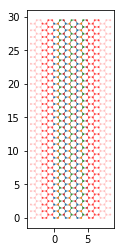

In [14]:
# Wsc must be multiples of eight
W=30
L=4
syst = make_system(W=W, L=L)
# Check that the system looks as intended.
# kwant.plot(syst, colorbar=False,fig_size=(40,10),num_lead_cells=2)
kwant.plot(syst,num_lead_cells=2)
# Finalize the system.
syst = syst.finalized()

In [51]:
mu=0.1
m=0.04
gn=0.1
# momenta = [-pi + 0.02 * pi * i for i in range(101)]
momenta= np.linspace(-1,1,601)*pi
def plot_wf(phi=0):
    params=dict(m=m, mu=mu, gn=gn, phi=phi, momenta=momenta)
    fig = plt.figure()  # create a figure object
    ax1 = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
    kwant.plotter.bands(syst.leads[0],params=params,ax=ax1)
    ax1.set_ylim(-0.5,0.5)
    plt.grid()
    plt.title(r'$\phi=$ %.3f' % (phi))
    plt.show()
    
# interact(plot_wf, phi=(0, 0.01, 0.001));

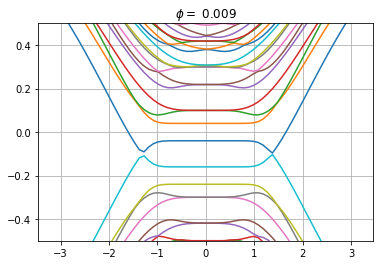

In [52]:
plot_wf(phi=0.0095)